# Stock  Trend  forecast  ###########

In [1]:
!pip install pandas_datareader
!pip install yfinanace

ERROR: Could not find a version that satisfies the requirement yfinanace (from versions: none)
ERROR: No matching distribution found for yfinanace


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
!pip install yfinance

In [4]:
import yfinance as yf
from datetime import datetime

# Define the time range
start = datetime(1996, 1, 1)
end = datetime(2024, 1, 16)

# Fetch historical stock data for AAPL from Yahoo Finance using yfinance
df = yf.download('SBIN.NS', start=start, end=end)

# Display the first few rows of the DataFrame
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,18.691147,18.978922,18.540184,18.823240,12.409930,43733533
1996-01-02,18.894005,18.964767,17.738192,18.224106,12.014929,56167280
1996-01-03,18.327892,18.568489,17.643839,17.738192,11.694572,68296318
1996-01-04,17.502312,17.832542,17.223972,17.676863,11.654140,86073880
1996-01-05,17.738192,17.785366,17.459852,17.577793,11.588825,76613039


In [5]:
df.shape

(7047, 6)

In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-09,632.000000,634.349976,624.500000,625.400024,625.400024,13400235
2024-01-10,624.799988,625.299988,618.200012,621.750000,621.750000,12742464
2024-01-11,626.000000,627.150024,618.500000,620.200012,620.200012,15533860
2024-01-12,623.799988,636.500000,621.099976,633.599976,633.599976,16620797
2024-01-15,638.900024,645.500000,636.099976,640.099976,640.099976,16844018


In [7]:
df=df.reset_index()  # remove date from index
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,18.691147,18.978922,18.540184,18.823240,12.409930,43733533
1,1996-01-02,18.894005,18.964767,17.738192,18.224106,12.014929,56167280
2,1996-01-03,18.327892,18.568489,17.643839,17.738192,11.694572,68296318
3,1996-01-04,17.502312,17.832542,17.223972,17.676863,11.654140,86073880
4,1996-01-05,17.738192,17.785366,17.459852,17.577793,11.588825,76613039
...,...,...,...,...,...,...,...
7042,2024-01-09,632.000000,634.349976,624.500000,625.400024,625.400024,13400235
7043,2024-01-10,624.799988,625.299988,618.200012,621.750000,621.750000,12742464
7044,2024-01-11,626.000000,627.150024,618.500000,620.200012,620.200012,15533860
7045,2024-01-12,623.799988,636.500000,621.099976,633.599976,633.599976,16620797


In [8]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,18.691147,18.978922,18.540184,18.823240,43733533
1,18.894005,18.964767,17.738192,18.224106,56167280
2,18.327892,18.568489,17.643839,17.738192,68296318
3,17.502312,17.832542,17.223972,17.676863,86073880
4,17.738192,17.785366,17.459852,17.577793,76613039


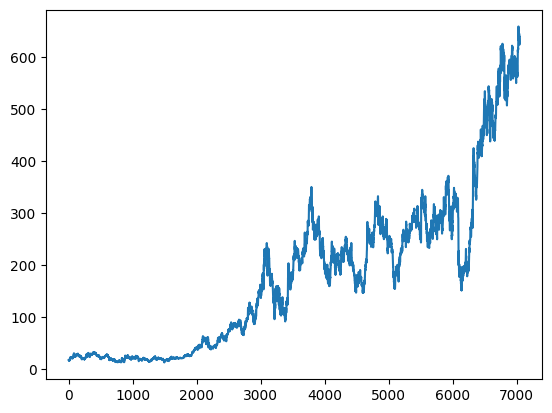

In [9]:
plt.plot(df.Open)

In [10]:
df

,Open,High,Low,Close,Volume
0,18.691147,18.978922,18.540184,18.823240,43733533
1,18.894005,18.964767,17.738192,18.224106,56167280
2,18.327892,18.568489,17.643839,17.738192,68296318
3,17.502312,17.832542,17.223972,17.676863,86073880
4,17.738192,17.785366,17.459852,17.577793,76613039
...,...,...,...,...,...
7042,632.000000,634.349976,624.500000,625.400024,13400235
7043,624.799988,625.299988,618.200012,621.750000,12742464
7044,626.000000,627.150024,618.500000,620.200012,15533860
7045,623.799988,636.500000,621.099976,633.599976,16620797


In [11]:
ma100=df.Open.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
7042    591.6900
7043    592.2085
7044    592.8805
7045    593.4610
7046    594.1500
Name: Open, Length: 7047, dtype: float64

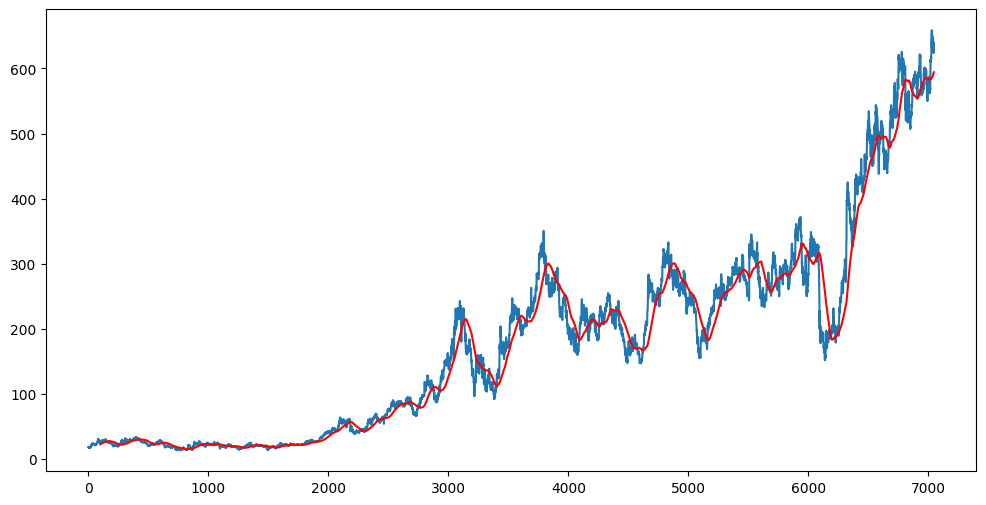

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Open)
plt.plot(ma100,'r')

In [13]:
ma200=df.Open.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
7042    581.407751
7043    581.888501
7044    582.385501
7045    582.894501
7046    583.478001
Name: Open, Length: 7047, dtype: float64

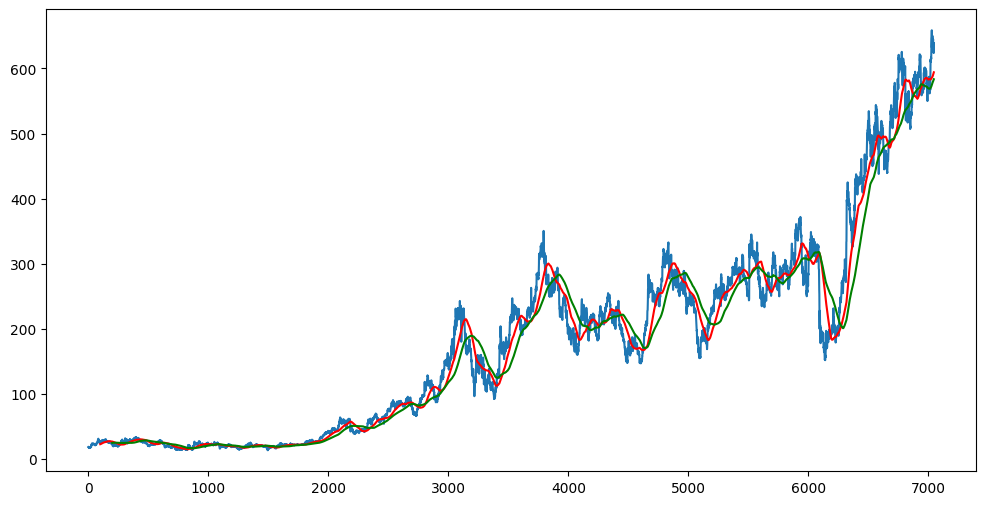

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df.Open)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [15]:
df.shape

(7047, 5)

In [16]:
from sklearn.model_selection import train_test_split

X = df[['Open']]

# Calculate the index for the split
split_index = int(0.7 * len(X))

# Split the data into training and testing sets sequentially
train_data = X.iloc[:split_index, :]
test_data = X.iloc[split_index:, :]

# Display the shapes of the resulting datasets
print(f"Train Data Shape: {train_data.shape}")
print(f"Test Data Shape: {test_data.shape}")

Train Data Shape: (4932, 1)
Test Data Shape: (2115, 1)


In [17]:
train_data

,Open
0,18.691147
1,18.894005
2,18.327892
3,17.502312
4,17.738192
...,...
4927,256.000000
4928,256.450012
4929,259.899994
4930,260.899994


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_data_array=scaler.fit_transform(train_data)
train_data_array

array([[0.0154677 ],
       [0.01606961],
       [0.01438986],
       ...,
       [0.73117465],
       [0.73414181],
       [0.75936273]])

In [19]:
x_train=[]
y_train=[]

for i in range(100,len(train_data_array)):
    x_train.append(train_data_array[i-100:i])
    y_train.append(train_data_array[i])
    
x_train    

[array([[0.0154677 ],
        [0.01606961],
        [0.01438986],
        [0.01194023],
        [0.01264012],
        [0.01187024],
        [0.0101205 ],
        [0.01166027],
        [0.01040046],
        [0.01306006],
        [0.01348   ],
        [0.01313005],
        [0.01299007],
        [0.01139431],
        [0.01131032],
        [0.01264012],
        [0.01457183],
        [0.01292008],
        [0.01375996],
        [0.01331202],
        [0.01389994],
        [0.01655954],
        [0.01571966],
        [0.01466982],
        [0.01893918],
        [0.02257864],
        [0.02663804],
        [0.02409042],
        [0.02525224],
        [0.0275479 ],
        [0.03083742],
        [0.02726795],
        [0.0302775 ],
        [0.02943763],
        [0.02886371],
        [0.02803783],
        [0.02831779],
        [0.02609212],
        [0.02730994],
        [0.02803783],
        [0.03055746],
        [0.03111738],
        [0.03167729],
        [0.0302775 ],
        [0.02803783],
        [0

In [20]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [21]:
x_train

array([[[0.0154677 ],
        [0.01606961],
        [0.01438986],
        ...,
        [0.04007604],
        [0.04259567],
        [0.04091592]],

       [[0.01606961],
        [0.01438986],
        [0.01194023],
        ...,
        [0.04259567],
        [0.04091592],
        [0.03797636]],

       [[0.01438986],
        [0.01194023],
        [0.01264012],
        ...,
        [0.04091592],
        [0.03797636],
        [0.0356667 ]],

       ...,

       [[0.90920467],
        [0.92997484],
        [0.93398053],
        ...,
        [0.7025415 ],
        [0.71960271],
        [0.72093797]],

       [[0.92997484],
        [0.93398053],
        [0.93739276],
        ...,
        [0.71960271],
        [0.72093797],
        [0.73117465]],

       [[0.93398053],
        [0.93739276],
        [0.94035992],
        ...,
        [0.72093797],
        [0.73117465],
        [0.73414181]]])

In [22]:
# ML DL Model 

In [23]:
x_train.shape,y_train.shape

((4832, 100, 1), (4832, 1))

In [24]:
y_train.reshape(-1, 1)

array([[0.03797636],
       [0.0356667 ],
       [0.03678653],
       ...,
       [0.73117465],
       [0.73414181],
       [0.75936273]])

In [25]:
y_train

array([[0.03797636],
       [0.0356667 ],
       [0.03678653],
       ...,
       [0.73117465],
       [0.73414181],
       [0.75936273]])

In [26]:
# Reshape y_train to have only one feature 
#(assuming univariate time series)
y_train = y_train.reshape(-1, 1)
y_train

array([[0.03797636],
       [0.0356667 ],
       [0.03678653],
       ...,
       [0.73117465],
       [0.73414181],
       [0.75936273]])

In [27]:
a

NameError: name 'a' is not defined

In [29]:
from tensorflow.keras.models import load_model

model=load_model('keras_model.h5')

In [30]:
model

In [ ]:
from tensorflow.keras.optimizers import Adam


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout


# Build LSTM model for stock trend forecasting
model = Sequential()

model.add(LSTM(units=50,
               activation='relu',
               return_sequences=True,
               input_shape=(x_train.shape[1],1)
              ))
#last(,,1) is no of columns
model.add(Dropout(0.2))


model.add(LSTM(units=60,
               activation='relu',
               return_sequences=True,
               
              ))

model.add(Dropout(0.3))

model.add(LSTM(units=80,
               activation='relu',
               return_sequences=True,
               
              ))

model.add(Dropout(0.4))

model.add(LSTM(units=120,
               activation='relu',
            
              ))

model.add(Dropout(0.5))


model.add(Dense(units=1))  # connect all above layers


opt = Adam(clipvalue=0.5)  # You can adjust the clipvalue
model.compile(optimizer=opt, loss='mean_squared_error')

model.fit(x_train,y_train,epochs=50)

In [ ]:
model.summary()

In [ ]:
model.save('keras_model.h5')


In [31]:
model

In [32]:
past100days=train_data.tail(100)
final_df=past100days.append(train_data,ignore_index=True)
final_df

C:\Users\mangeshk\AppData\Local\Temp\ipykernel_35188\2377501173.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past100days.append(train_data,ignore_index=True)


,Open
0,329.399994
1,330.399994
2,332.799988
3,328.700012
4,309.500000
...,...
5027,256.000000
5028,256.450012
5029,259.899994
5030,260.899994


In [33]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.93739276],
       [0.94035992],
       [0.94748111],
       ...,
       [0.73117465],
       [0.73414181],
       [0.75936273]])

In [34]:
input_data.shape

(5032, 1)

In [35]:
x_test = []
y_test = []

# Change the loop condition to ensure it starts from index 100
for i in range(100, len(input_data)):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i])

x_test, y_test = np.array(x_test), np.array(y_test)

In [36]:
x_test.shape,y_test.shape

((4932, 100, 1), (4932, 1))

In [37]:
x_train.shape

(4832, 100, 1)

In [38]:
x_test.shape

(4932, 100, 1)

In [39]:
y_pred=model.predict(x_test)

155/155 [==============================] - 7s 42ms/step


In [40]:
y_pred

array([[0.7096583 ],
       [0.6868018 ],
       [0.6507598 ],
       ...,
       [0.70057994],
       [0.7005005 ],
       [0.70300597]], dtype=float32)

In [41]:
y_pred.shape

(4932, 1)

In [42]:
y_test

array([[0.0154677 ],
       [0.01606961],
       [0.01438986],
       ...,
       [0.73117465],
       [0.73414181],
       [0.75936273]])

In [43]:
y_pred

array([[0.7096583 ],
       [0.6868018 ],
       [0.6507598 ],
       ...,
       [0.70057994],
       [0.7005005 ],
       [0.70300597]], dtype=float32)

In [44]:
scaler.scale_  

array([0.00296717])

In [45]:
y_pred

array([[0.7096583 ],
       [0.6868018 ],
       [0.6507598 ],
       ...,
       [0.70057994],
       [0.7005005 ],
       [0.70300597]], dtype=float32)

In [46]:
scale_factor=1/0.00296717
y_pred=y_pred*scale_factor
y_test=y_test*scale_factor

In [47]:
y_pred,y_test

(array([[239.1701 ],
        [231.46696],
        [219.32004],
        ...,
        [236.11049],
        [236.08371],
        [236.92812]], dtype=float32),
 array([[  5.21294651],
        [  5.41580428],
        [  4.84969232],
        ...,
        [246.4215551 ],
        [247.42155411],
        [255.92154571]]))

In [48]:
y_test.shape

(4932, 1)

In [49]:
y_pred.shape

(4932, 1)

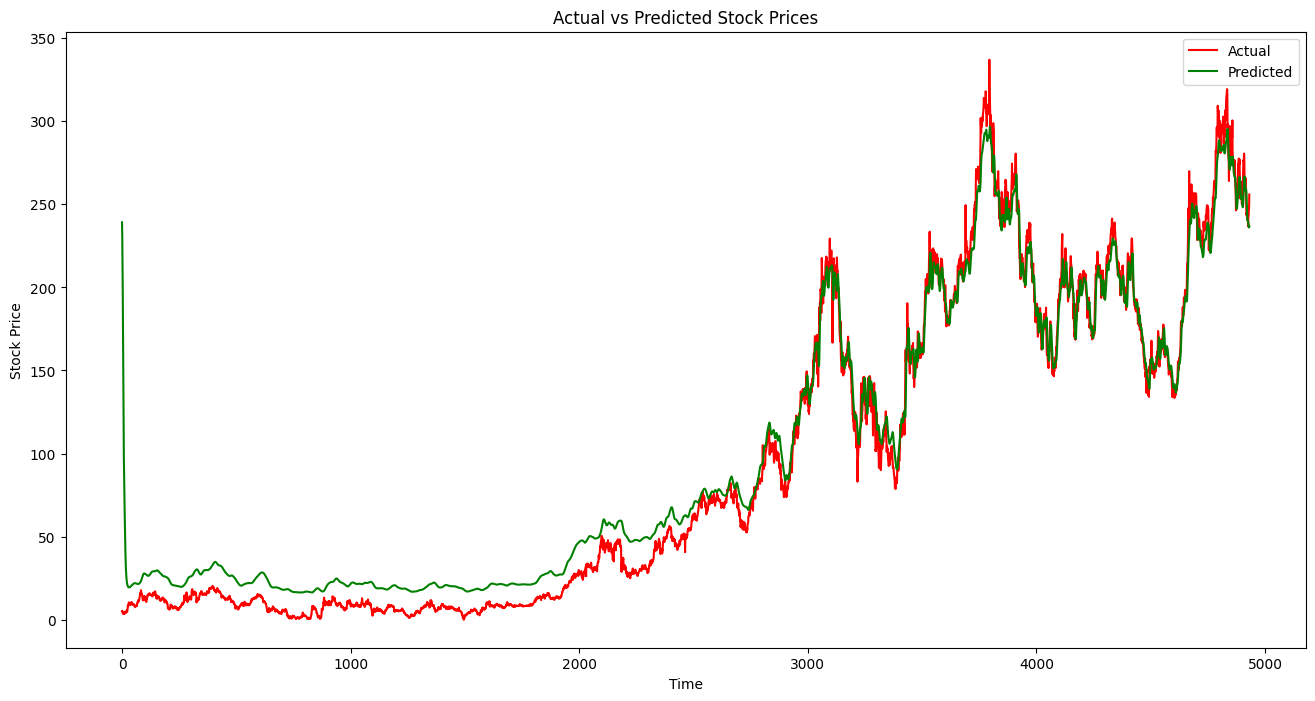

In [50]:
# Plotting the actual values (y_test) and predicted values (y_pred)
plt.figure(figsize=(16,8))
plt.plot(y_test, 'r',label='Actual')
plt.plot(y_pred, 'g', label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()